# Import headers

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})

%matplotlib inline

# {Inputs}

In [2]:
ticker = 'googl'

eps_ttm             = 46.60                # {yahoo finance}
hist_5y_growth_rate = 14.93                # {yahoo finance}
pred_5y_growth_rate = 9.71                 # {yahoo finance}
my_est_growth_rate  = 15.00                # your own prediction
pe_ratio_current    = 31.86                # {msn money}
pe_ratio_5y_high    = 34.06                # {msn money}
pe_ratio_5y_low     = 23.91                # {msn money}

fv_morning_star     = 1300                 # {morning star}

pe_ratio_5y_avg    = (pe_ratio_5y_high + pe_ratio_5y_low) / 2
pe_ratio_rule_1    = 2*hist_5y_growth_rate # Rule #1
est_pe_ratio       = min(pe_ratio_rule_1, pe_ratio_5y_avg)

string_len = 31
print('{:{prec}}: {}\n'.format('Current PE', pe_ratio_current, prec=string_len))

print('{:{prec}}: {}'.format('Past 5yrs avg PE', pe_ratio_5y_avg, prec=string_len))
print('{:{prec}}: {}'.format('PE from Historical growth rate', pe_ratio_rule_1, prec=string_len))
print('{:{prec}}: {} {}\n'.format('Estimated PE', est_pe_ratio, ' (Used for predicting fair value)', prec=string_len))

print('{:{prec}}: {}'.format('Historical growth rate', hist_5y_growth_rate, prec=string_len))
print('{:{prec}}: {}'.format('Analysts predicted growth rate', pred_5y_growth_rate, prec=string_len))
print('{:{prec}}: {}'.format('Custom predicted growth rate', my_est_growth_rate, prec=string_len))

Current PE                     : 31.86

Past 5yrs avg PE               : 28.985
PE from Historical growth rate : 29.86
Estimated PE                   : 28.985  (Used for predicting fair value)

Historical growth rate         : 14.93
Analysts predicted growth rate : 9.71
Custom predicted growth rate   : 15.0


# Estimate future intrinsic value 
**based on last 5 years avg pe ratio and estimated future eps**

In [3]:
# estimate future eps (for 10 years) based on current_eps and estimated_growth_rate
# future_eps = current_eps + (current_eps * growth_rate)

years_to_estimate_eps = 10 - 1 # first year is already known
est_eps_list   = [eps_ttm]

est_eps                             = eps_ttm
est_eps_my_growth_rate              = eps_ttm
est_eps_analysts_growth_rate        = eps_ttm

est_value_list                      = [eps_ttm * est_pe_ratio]
est_value_my_growth_rate_list       = [eps_ttm * est_pe_ratio]
est_value_analysts_growth_rate_list = [eps_ttm * est_pe_ratio]

for i in range(years_to_estimate_eps):
    est_eps = est_eps + (est_eps * hist_5y_growth_rate/100)
    est_eps_list.append(round(est_eps, 2))
    est_value_list.append(round(est_eps * est_pe_ratio, 2))
    
    est_eps_my_growth_rate = est_eps_my_growth_rate + (est_eps_my_growth_rate * my_est_growth_rate/100)
    est_value_my_growth_rate_list.append(round(est_eps_my_growth_rate * est_pe_ratio, 2))

    est_eps_analysts_growth_rate = est_eps_analysts_growth_rate + (est_eps_analysts_growth_rate * pred_5y_growth_rate/100)
    est_value_analysts_growth_rate_list.append(round(est_eps_analysts_growth_rate * est_pe_ratio, 2))

est_eps_series = pd.Series(est_eps_list, name='Est EPS', index=range(1,11))
est_value_series = pd.Series(est_value_list, name='Est Fair Value', index=range(1,11))
est_value_my_growth_rate_series = pd.Series(est_value_my_growth_rate_list, name='Est Fair Value (My Growth Rate)', index=range(1,11))

estimated_price_df = pd.DataFrame([est_eps_series, est_value_series, est_value_my_growth_rate_series]).T
# estimated_price_df

# Read fundamentals

In [4]:
df = pd.read_csv('data/{}.csv'.format(ticker), sep='|', parse_dates=True, index_col=0, header=None).T
df['Year'] = pd.to_datetime(df['Year'].astype('int32'), format='%Y', yearfirst=False)
df.set_index('Year', inplace=True)

df.head()

,Revenue,Revenue Growth,Gross Profit,Gross Margin,Operating Profit,Operating Margin,Earnings Per Share,EPS Growth,Return on Assets,Return on Equity,Return on Invested Capital,Equity Growth,Free Cash Flow Growth,Market Capitalization,Price-to-Earnings
Year,,,,,,,,,,,,,,,
2009-01-01,23651.0,8.5,14807.0,62.6,8475.0,35.8,10.21,53.3,18.0,20.3,54.5,27.5,54.8,196494.0,30.14
2010-01-01,29321.0,24.0,18904.0,64.5,10551.0,36.0,13.17,28.9,17.3,20.7,64.8,28.4,-29.5,189302.0,22.26
2011-01-01,37905.0,29.3,24717.0,65.2,12147.0,32.0,14.89,13.1,14.9,18.7,60.0,25.7,53.9,208551.0,21.42
2012-01-01,46039.0,21.5,28863.0,62.7,14066.0,30.6,16.16,8.5,12.9,16.5,45.8,23.3,-69.9,232445.0,21.65
2013-01-01,55519.0,20.6,33526.0,60.4,15616.0,28.1,18.79,16.3,12.4,16.0,40.4,21.7,254.7,373216.0,29.31


# Inspect the datatypes

In [5]:
# df.dtypes

# Draw charts fn()

In [6]:
def draw_chart(data, columns, title, mark_green_zone=(False, 15), draw_mean=False):
    fig, ax = plt.subplots(1,1, figsize=(16,8))
    ax.set_title(title)
    fig.tight_layout()
    
    for c in columns:
        plt.plot(data[c], marker='o', linestyle='-', label=c)

    if mark_green_zone[0]:
        ax.axhspan(ymin=0, ymax=mark_green_zone[1], color='green', fill=True, alpha=.1)
        
    if draw_mean:
        plt.plot(df[columns].mean(1), marker=',', linestyle='--', label='Average Growth', color='gray')

    ax.legend()
    plt.show()

# Fundamentals

0           Revenue Growth  EPS Growth  Free Cash Flow Growth  Equity Growth
Year                                                                        
2009-01-01             8.5        53.3                   54.8           27.5
2010-01-01            24.0        28.9                  -29.5           28.4
2011-01-01            29.3        13.1                   53.9           25.7
2012-01-01            21.5         8.5                  -69.9           23.3
2013-01-01            20.6        16.3                  254.7           21.7
2014-01-01            18.9         9.5                  -27.7           19.0
2015-01-01            13.6        11.0                  130.1           15.9
2016-01-01            20.4        21.9                   51.6           15.5
2017-01-01            22.8       -35.4                   -4.9            9.7
2018-01-01            23.4       142.8                   -9.6           16.5


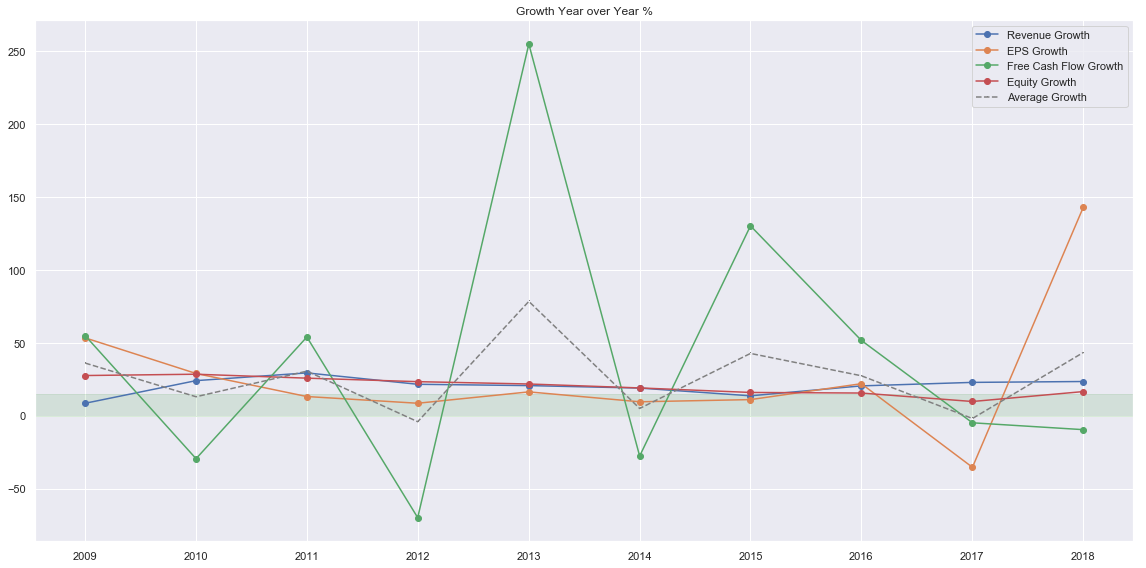

In [7]:
columns = ['Revenue Growth',
           'EPS Growth',
           'Free Cash Flow Growth',
           'Equity Growth']

# print('All 4 growth rates should be >15%')

print(df[columns])

draw_chart(df, columns, title='Growth Year over Year %', mark_green_zone=(True, 15), draw_mean=True)

# Returns

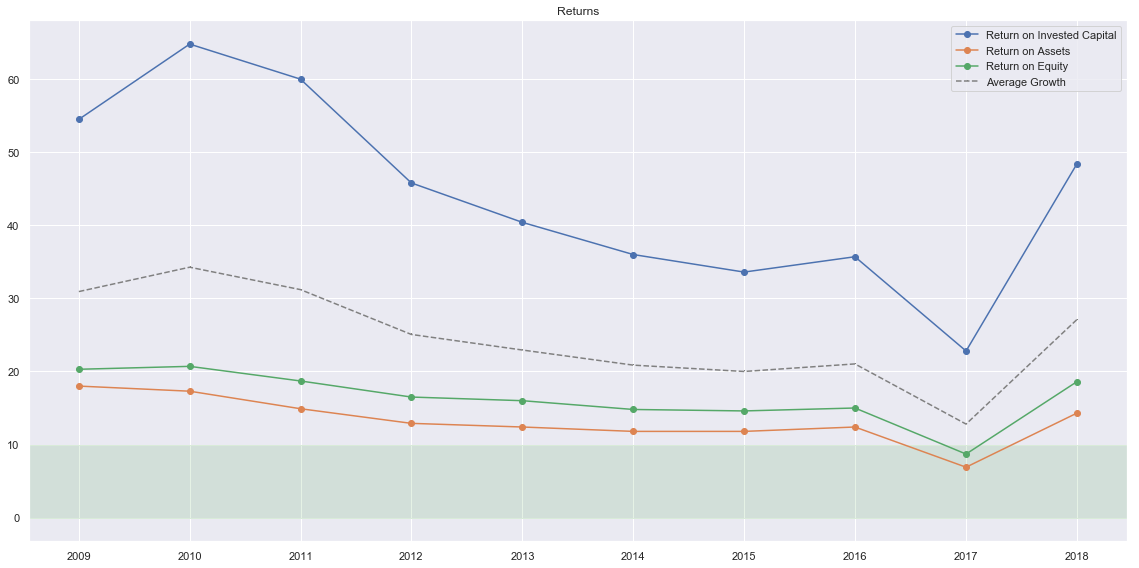

In [8]:
columns = ['Return on Invested Capital',
           'Return on Assets',
           'Return on Equity']

draw_chart(df, columns, title='Returns', mark_green_zone=(True, 10), draw_mean=True)

# ROIC: should be >10%
# ROE : should be +ve

# PE

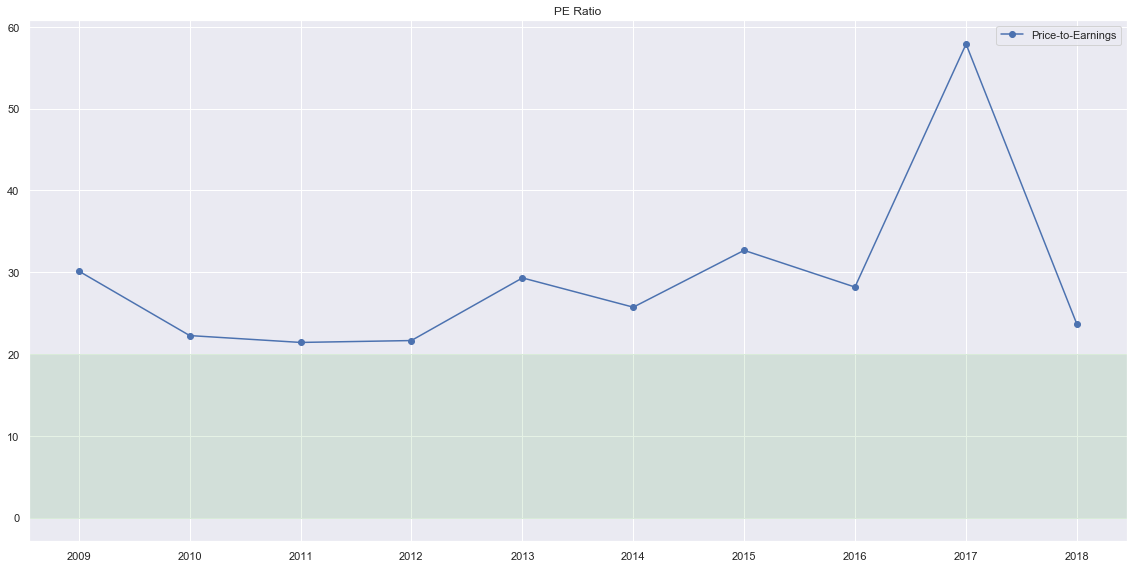

In [9]:
columns = ['Price-to-Earnings']

draw_chart(df, columns, title='PE Ratio', mark_green_zone=(True, 20))

# PE ratio: Lower is better. Compare with competators.
# EPS     : Should be +ve

# Market Cap

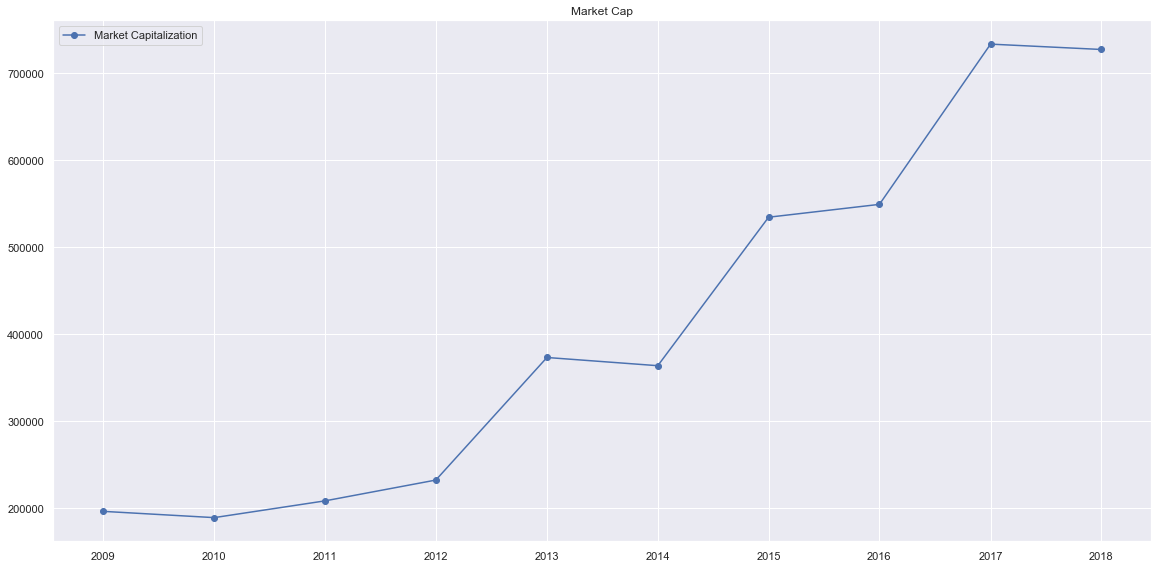

In [10]:
columns = ['Market Capitalization']
draw_chart(df, columns, title='Market Cap')

# Estimated Fair Value

    Est EPS  Est Fair Value  Est Fair Value (My Growth Rate)
1     46.60        1350.701                         1350.701
2     53.56        1552.360                         1553.310
3     61.55        1784.130                         1786.300
4     70.74        2050.500                         2054.250
5     81.31        2356.640                         2362.380
6     93.44        2708.480                         2716.740
7    107.40        3112.860                         3124.250
8    123.43        3577.610                         3592.890
9    141.86        4111.750                         4131.830
10   163.04        4725.630                         4751.600


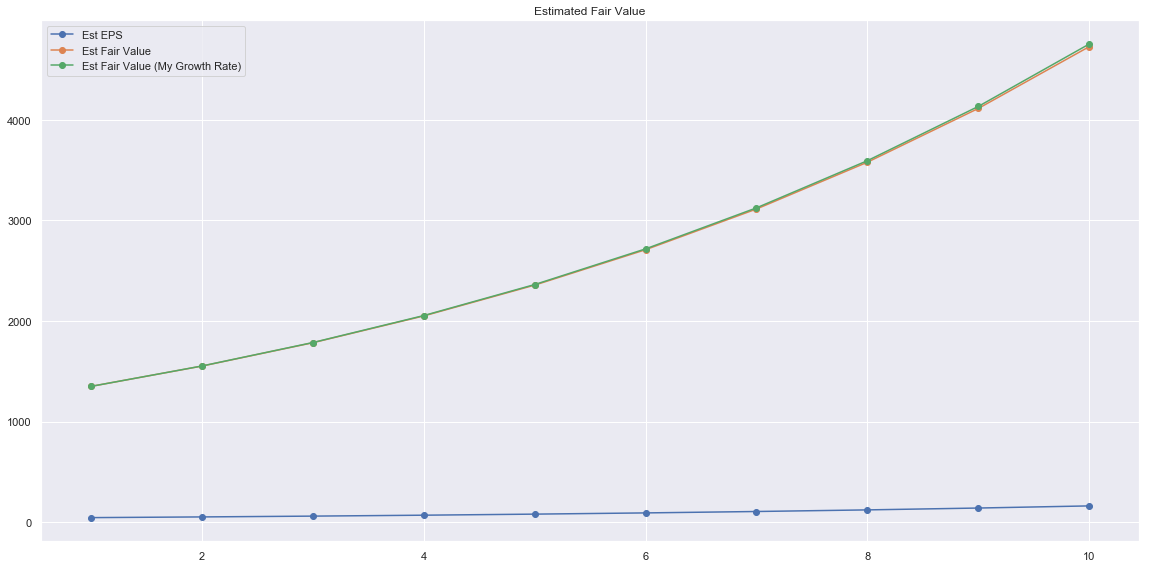

In [11]:
columns = ['Est EPS', 'Est Fair Value', 'Est Fair Value (My Growth Rate)']
print(estimated_price_df)
draw_chart(estimated_price_df, columns, title='Estimated Fair Value')

In [12]:
columns = ['Revenue Growth',
           'EPS Growth',
           'Free Cash Flow Growth',
           'Equity Growth']
df[columns].mean(1)[-1]

43.275000000000006

# Look at some numbers

In [15]:
# At buying point, current PE should be less than
# - historical average PE
# - 2x analysts 5y growth rate prediction {yahoo finance}
# - 2x historical equity growth rate      {}
# - 2x last years average growth rate (revenue, equity, fcf, eps)

columns = ['Revenue Growth',
           'EPS Growth',
           'Free Cash Flow Growth',
           'Equity Growth']

string_len = 33
print('{:{prec}}: {}\n'.format('Current PE', pe_ratio_current, prec=string_len))

print('{:{prec}}: {}'.format('Historical avg PE', pe_ratio_5y_avg, prec=string_len))
print('{:{prec}}: {}'.format('Historical Growth Rate', hist_5y_growth_rate, prec=string_len))
print('{:{prec}}: {}'.format('Predicted Growth Rate', pred_5y_growth_rate, prec=string_len))
print('{:{prec}}: {}'.format('Historical Equity Growth Rate', df['Equity Growth'].mean(), prec=string_len))
print('{:{prec}}: {}'.format('Last Years Avg Growth Rate', round(df[columns].mean(1)[-1],2), prec=string_len))

Current PE                       : 31.86

Historical avg PE                : 28.985
Historical Growth Rate           : 14.93
Predicted Growth Rate            : 9.71
Historical Equity Growth Rate    : 20.32
Last Years Avg Growth Rate       : 43.28


# Fair Value prediction

In [14]:
fv_historic_pe = round(eps_ttm * pe_ratio_5y_avg, 2)
fv_historic_growth = round(eps_ttm * (2*hist_5y_growth_rate), 2)
fv_analysts_prediction = round(eps_ttm * (2*pred_5y_growth_rate), 2)

string_len = 47
print('{:{prec}}: {}'.format('Fair Value (Morning Star)', fv_morning_star, prec=string_len))
print('{:{prec}}: {}'.format('Fair Value (Historic Avg PE (msn))', fv_historic_pe, prec=string_len))
print('{:{prec}}: {}'.format('Fair Value (Historic Growth (yahoo))', fv_historic_growth, prec=string_len))
print('{:{prec}}: {}'.format('Fair Value (Analysts predicted Growth (yahoo))', fv_analysts_prediction, prec=string_len))

Fair Value (Morning Star)                      : 1300
Fair Value (Historic Avg PE (msn))             : 1350.7
Fair Value (Historic Growth (yahoo))           : 1391.48
Fair Value (Analysts predicted Growth (yahoo)) : 904.97


# Verdict: Bye bellow {1200}